In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US.dropna(subset=['salary_year_avg'],inplace=True)
df_DA_US.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."


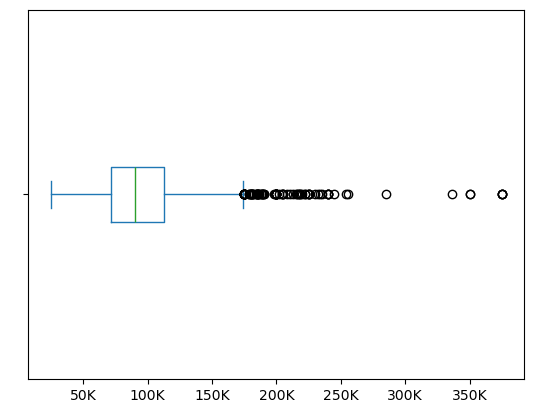

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: ''))

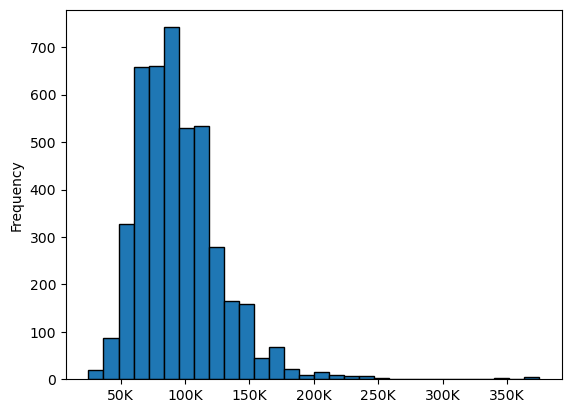

In [17]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='black')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

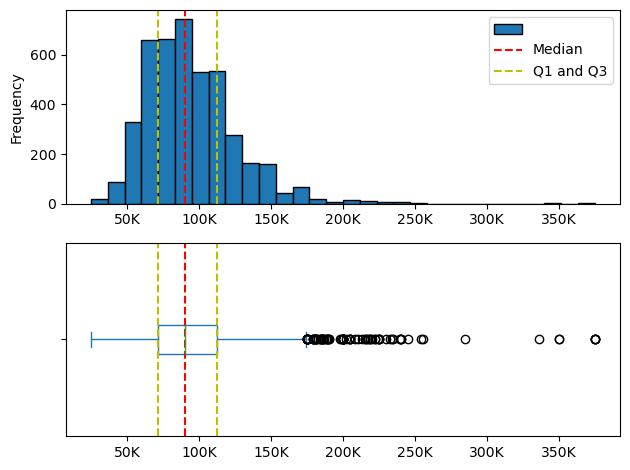

In [ ]:
fig, ax = plt.subplots(2,1)

df_DA_US['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='black',ax=ax[0])
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
ax[0].axvline(df_DA_US['salary_year_avg'].median(),linestyle='--',color='r')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25),linestyle='--',color='y')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75),linestyle='--',color='y')
ax[0].legend(['','Median','Q1 and Q3'])

df_DA_US['salary_year_avg'].plot(kind='box',vert=False, ax=ax[1])
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: ''))
ax[1].axvline(df_DA_US['salary_year_avg'].median(),linestyle='--',color='r')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25),linestyle='--',color='y')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75),linestyle='--',color='y')

fig.tight_layout()

In [ ]:

job_titles = ['Data Analyst','Data Engineer','Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US.dropna(subset=['salary_year_avg'],inplace=True)


In [64]:
job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5144\1028242118.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles,vert=False)


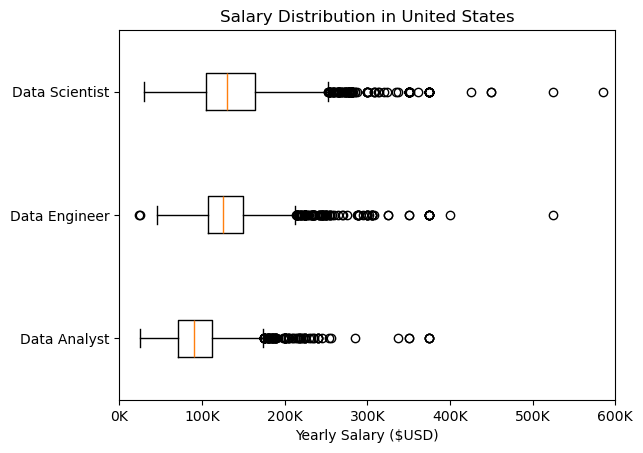

In [71]:
plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution in United States')
plt.xlabel('Yearly Salary ($USD)')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'{int(x/1000)}K'))

plt.xlim(0,600_000)
plt.show()